In [107]:
#This notebook will let you run BBii-Decon with Pre-processing using Non-Local Means (NLM) denoising Version 2
#Dependencies are bbii-decon, matplotlib, numpy, pypher, scikit-image, scipy, tifffile, time 
#Author: Graham Dellaire

#Load dependencies

import scipy.io
import matplotlib.pyplot as plt
from pypher.pypher import psf2otf
import scipy.signal
import numpy as np
import time
import tifffile as tiff
from tifffile import imsave, imread
from bbii_decon import bbii
from skimage.restoration import denoise_nl_means, estimate_sigma

In [108]:
#Load TIFF images using tifffile
PSF = tiff.imread('PSF.tif')
img = tiff.imread('nucleus.tif')
img = img.astype('float32') #Important! - NLM parameters below are optimized for float32 or float64 numpy arrays
print('Images loaded:')
print('PSF dtype =', PSF.dtype, 'Shape: ', PSF.shape) 
print('img dtype =', img.dtype, 'Shape: ', img.shape)

Images loaded:
PSF dtype = float32 Shape:  (256, 256)
img dtype = float32 Shape:  (382, 402)


estimated noise standard deviation = 318.06391137288455
NLM Denoising Execution Time:
4.058369398117065
seconds
Original Image [left] and after NLM Denoising [right]


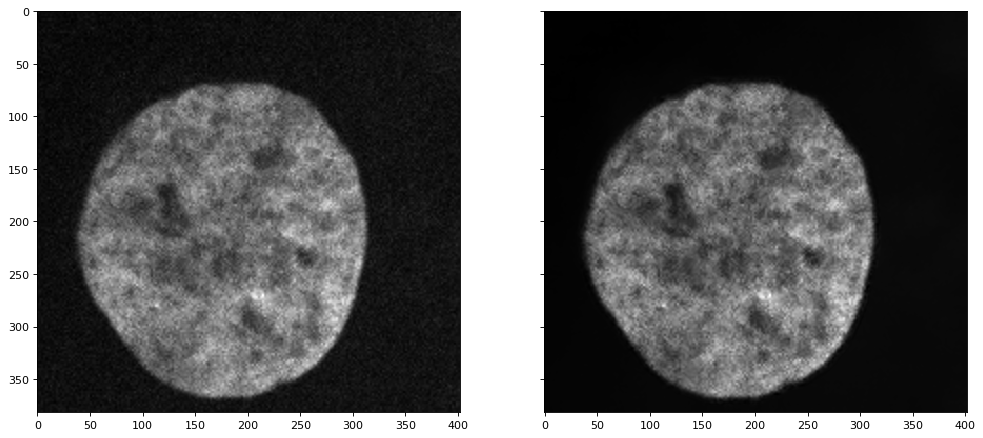

In [109]:
# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')

# Start timing of NLM denoising 
start = time.time()
print("NLM Denoising Execution Time:")

# Non local means denoise the deconvolved image
denoised = denoise_nl_means(img, patch_size=15, patch_distance=22, h=650, fast_mode=True, sigma=sigma_est)
    
# end timing of NLM denoising
end = time.time()
print(end - start)
print("seconds")

# Compare the deconvolved to image to the denoised image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(denoised, cmap='gray')

print('Original Image [left] and after NLM Denoising [right]')

Subtracted background [left] and denoised image [right]


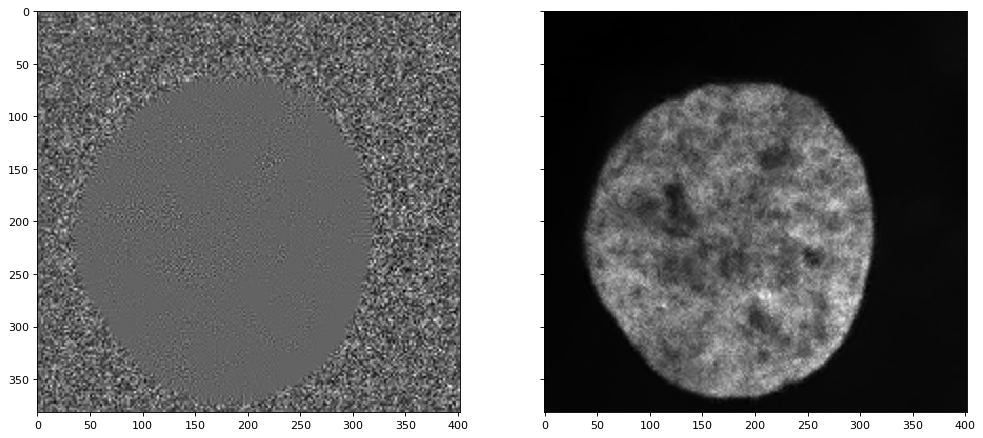

In [110]:
#Visualizing background noise removed

dif = img - denoised

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(dif, cmap='gray')
ax[1].imshow(denoised, cmap='gray')


print('Subtracted background [left] and denoised image [right]')

BBii-Decon Execution Time:
1.0637295246124268
seconds
Original Denoised Image [left] and after BBii-Decon [right]


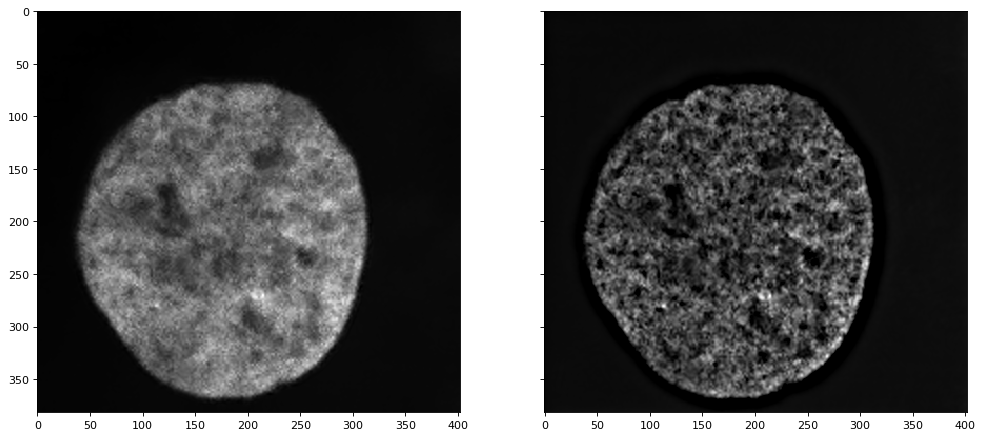

In [111]:
# Start timing of BBii reconstruction
start = time.time()
print("BBii-Decon Execution Time:")

# run the deblurring
[f, alpha, proj] = bbii(PSF, denoised, 15, 1.0e-08, 0.98)

# end timing of BBii reconstruction
end = time.time()
print(end - start)
print("seconds")    
    
# Compare the orginal image to the deconvolved image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(denoised, cmap='gray')
ax[1].imshow(f, cmap='gray')

f1 = f

print('Original Denoised Image [left] and after BBii-Decon [right]')    

BBii-Decon Execution Time:
1.070948839187622
seconds
BBii-Decon only [left] and NLM Denoising before BBii-Decon [right]


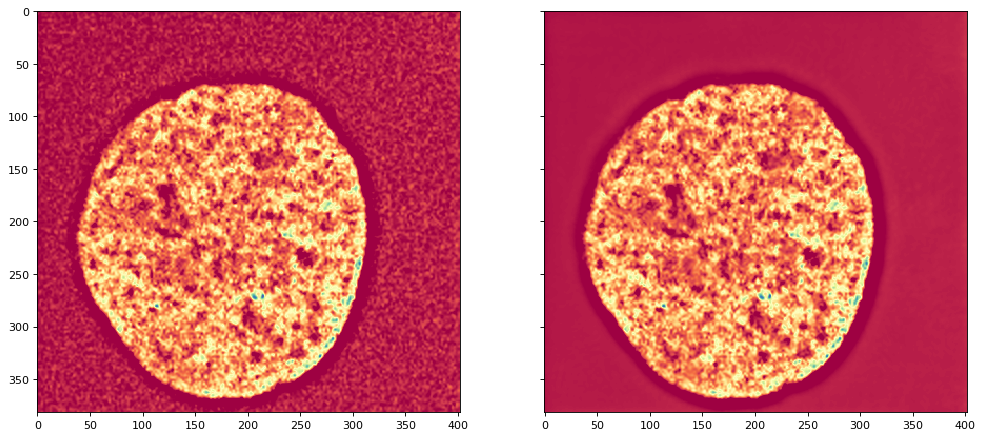

In [112]:
# Start timing of BBii reconstruction
start = time.time()
print("BBii-Decon Execution Time:")

# run the deblurring
[f, alpha, proj] = bbii(PSF, img, 15, 1.0e-08, 0.98)

# end timing of BBii reconstruction
end = time.time()
print(end - start)
print("seconds")    

# Compare the deconvolved to image to the denoised image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(f, cmap='Spectral')
ax[1].imshow(f1, cmap='Spectral')

print('BBii-Decon only [left] and NLM Denoising before BBii-Decon [right]')

Subtracted background [left] and NLM Denoising + Deconvolution image[right]


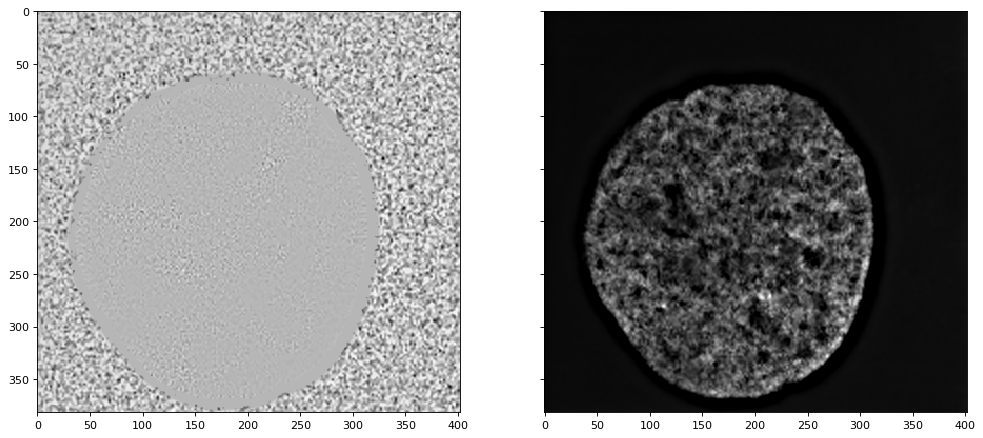

In [113]:
#Visualizing background noise removed by pre-processing with NLM before BBii-decon

dif = f1 - f

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(dif, cmap='gray')
ax[1].imshow(f1, cmap='gray')


print('Subtracted background [left] and NLM Denoising + Deconvolution image[right]')


estimated noise standard deviation = 417.65183066415955
NLM Denoising Execution Time:
3.955587148666382
seconds
NLM before BBii-Decon [left] and BBii-Decon followed by NLM denoising [right]


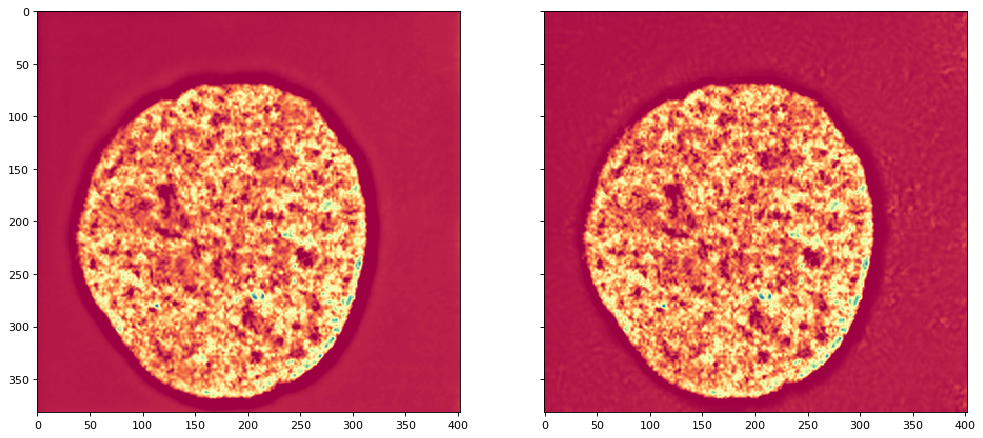

In [115]:
#Comparison of effects of NLM denoising pre or post BBii-decon

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(f, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')


# Start timing of NLM denoising 
start = time.time()
print("NLM Denoising Execution Time:")

# Non local means denoise the deconvolved image
denoised2 = denoise_nl_means(f, patch_size=15, patch_distance=22, h=600, fast_mode=True, sigma=sigma_est)
    
# end timing of NLM denoising
end = time.time()
print(end - start)
print("seconds")

# Compare the deconvolved to image to the denoised image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(f1, cmap='Spectral')
ax[1].imshow(denoised2, cmap='Spectral')

print('NLM before BBii-Decon [left] and BBii-Decon followed by NLM denoising [right]')

Subtracted background by pre-processing with NLM before BBii-Decon [left] and NLM Denoising + Deconvolution image[right]


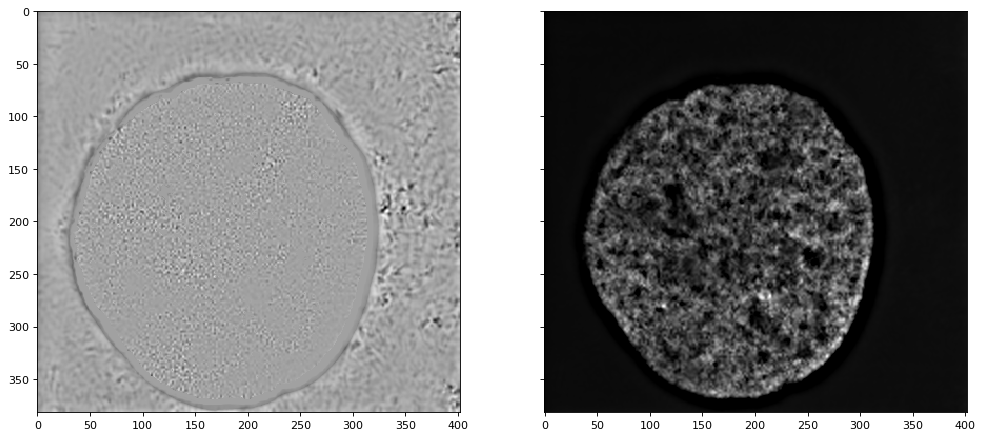

In [117]:
#Visualizing background noise removed by pre rather than post NLM processing before BBii-Decon

dif1 = f1 - denoised2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(dif1, cmap='gray')
ax[1].imshow(f1, cmap='gray')


print('Subtracted background by pre-processing with NLM before BBii-Decon [left] and NLM Denoising + Deconvolution image[right]')
